In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


file_path = 'price.csv'
price_df = pd.read_csv(file_path)

In [2]:
# Общая информация
print(f"Размер датасета: {price_df.shape}")
print("\nПервые 5 строк:")
display(price_df.head())

Размер датасета: (20345, 10)

Первые 5 строк:


,Расстояние (км),Вес груза (кг),Объём груза (м³),Плотность (кг/м³),Стоимость топлива (тенге/л),Тип груза,Тип транспорта,Зарплата водителя (тенге),Налоги и сборы (тенге),Стоимость доставки (тенге)
0,1670.0,1601.0,5.6,286.0,198.0,Техника,Тент,141528.0,33601.0,217423.0
1,1259.0,747.0,2.2,340.0,186.0,Продукты,Тент,100124.0,19513.0,221081.0
2,392.0,37950.0,58.3,651.0,194.0,Продукты,Грузовик,164789.0,34464.0,245672.0
3,2784.0,4968.0,62.9,79.0,195.0,Мебель,Грузовик,113642.0,22592.0,311172.0
4,1691.0,2553.0,15.8,162.0,217.0,Мебель,Грузовик,121309.0,24993.0,236791.0


In [3]:
print("\nDataset Information:")
price_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20345 entries, 0 to 20344
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Расстояние (км)              20294 non-null  float64
 1   Вес груза (кг)               20279 non-null  float64
 2   Объём груза (м³)             20306 non-null  float64
 3   Плотность (кг/м³)            20275 non-null  float64
 4   Стоимость топлива (тенге/л)  20294 non-null  float64
 5   Тип груза                    20292 non-null  object 
 6   Тип транспорта               20286 non-null  object 
 7   Зарплата водителя (тенге)    19247 non-null  float64
 8   Налоги и сборы (тенге)       19237 non-null  float64
 9   Стоимость доставки (тенге)   20243 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.6+ MB


In [4]:
# Описательная статистика для числовых признаков
display(price_df.describe().round(0))

,Расстояние (км),Вес груза (кг),Объём груза (м³),Плотность (кг/м³),Стоимость топлива (тенге/л),Зарплата водителя (тенге),Налоги и сборы (тенге),Стоимость доставки (тенге)
count,20294.0,20279.0,20306.0,20275.0,20294.0,19247.0,19237.0,20243.0
mean,1529.0,11374.0,30.0,497.0,220.0,149797.0,29965.0,264119.0
std,835.0,10204.0,24.0,456.0,23.0,28919.0,7269.0,73299.0
min,81.0,300.0,0.0,70.0,180.0,100011.0,15082.0,91424.0
25%,807.0,2484.0,9.0,225.0,200.0,124716.0,24441.0,210038.0
50%,1528.0,7885.0,26.0,378.0,220.0,149583.0,29281.0,258997.0
75%,2245.0,18228.0,44.0,575.0,240.0,174718.0,34952.0,310828.0
max,3132.0,39959.0,123.0,2499.0,260.0,199994.0,49634.0,613089.0


In [5]:
# Описательная статистика для строковых признаков
display(price_df.select_dtypes(include=['object', 'category']).describe())

,Тип груза,Тип транспорта
count,20292,20286
unique,5,3
top,Мебель,Грузовик
freq,5047,10594


In [6]:
# Пустые данные
missing_counts = price_df.isnull().sum()
missing_percent = (missing_counts / len(price_df)) * 100
missing_data = pd.DataFrame({'Количество пропусков': missing_counts, 'Процент пропусков': missing_percent})
display(missing_data)


,Количество пропусков,Процент пропусков
Расстояние (км),51,0.250676
Вес груза (кг),66,0.324404
Объём груза (м³),39,0.191693
Плотность (кг/м³),70,0.344065
Стоимость топлива (тенге/л),51,0.250676
Тип груза,53,0.260506
Тип транспорта,59,0.289998
Зарплата водителя (тенге),1098,5.396903
Налоги и сборы (тенге),1108,5.446056
Стоимость доставки (тенге),102,0.501352


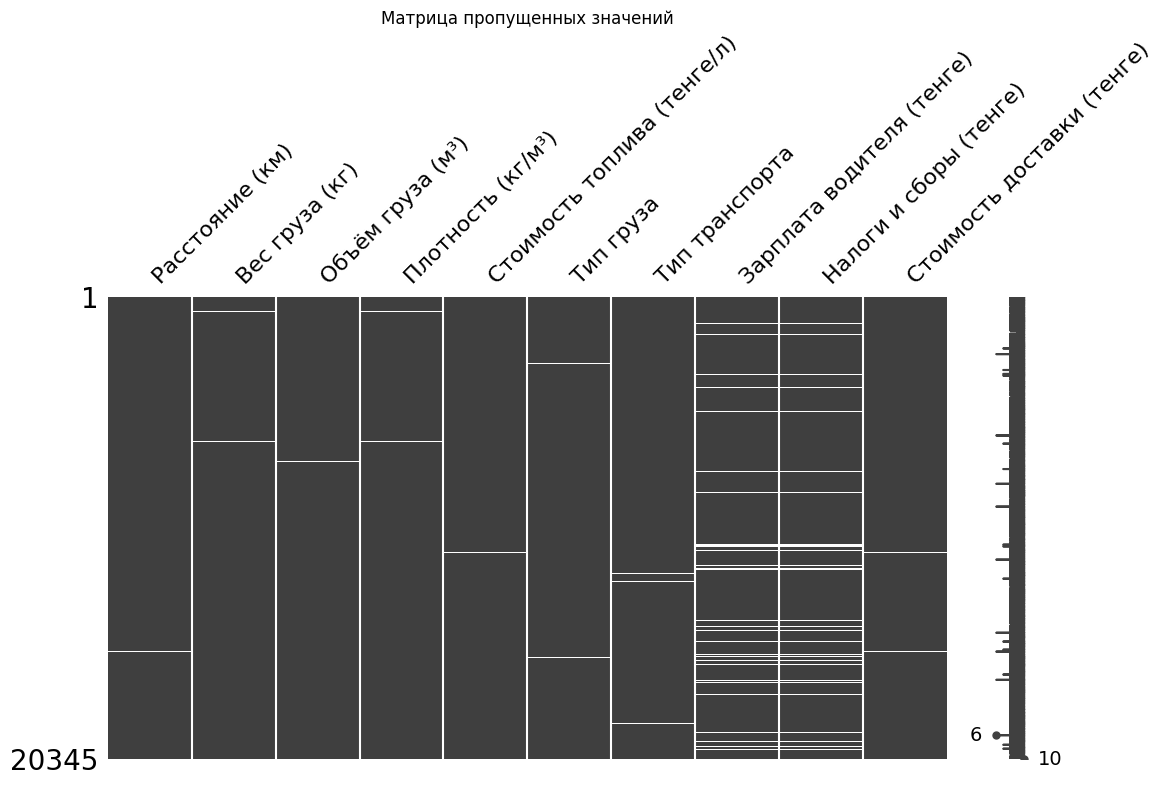

In [7]:
# Визуализация пропусков
msno.matrix(price_df, figsize=(12,6))
plt.title('Матрица пропущенных значений')
plt.show()

In [8]:
# Дупликаты
duplicate_count = price_df.duplicated().sum()
print(f"Количество дублированных строк: {duplicate_count}")

Количество дублированных строк: 0


In [9]:
# Уникальные значения
print("\nUnique Values per Column")
for col in price_df.columns:
    print(f"{col}: {price_df[col].nunique()} unique values")


Unique Values per Column
Расстояние (км): 3014 unique values
Вес груза (кг): 13601 unique values
Объём груза (м³): 6205 unique values
Плотность (кг/м³): 1859 unique values
Стоимость топлива (тенге/л): 81 unique values
Тип груза: 5 unique values
Тип транспорта: 3 unique values
Зарплата водителя (тенге): 17556 unique values
Налоги и сборы (тенге): 13663 unique values
Стоимость доставки (тенге): 19452 unique values


In [10]:
# Разделение признаков на числовые и строковые
numeric_cols = price_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = price_df.select_dtypes(include=['object']).columns.tolist()
print("Числовые признаки:", numeric_cols)
print("Строковые признаки:", categorical_cols)

Числовые признаки: ['Расстояние (км)', 'Вес груза (кг)', 'Объём груза (м³)', 'Плотность (кг/м³)', 'Стоимость топлива (тенге/л)', 'Зарплата водителя (тенге)', 'Налоги и сборы (тенге)', 'Стоимость доставки (тенге)']
Строковые признаки: ['Тип груза', 'Тип транспорта']


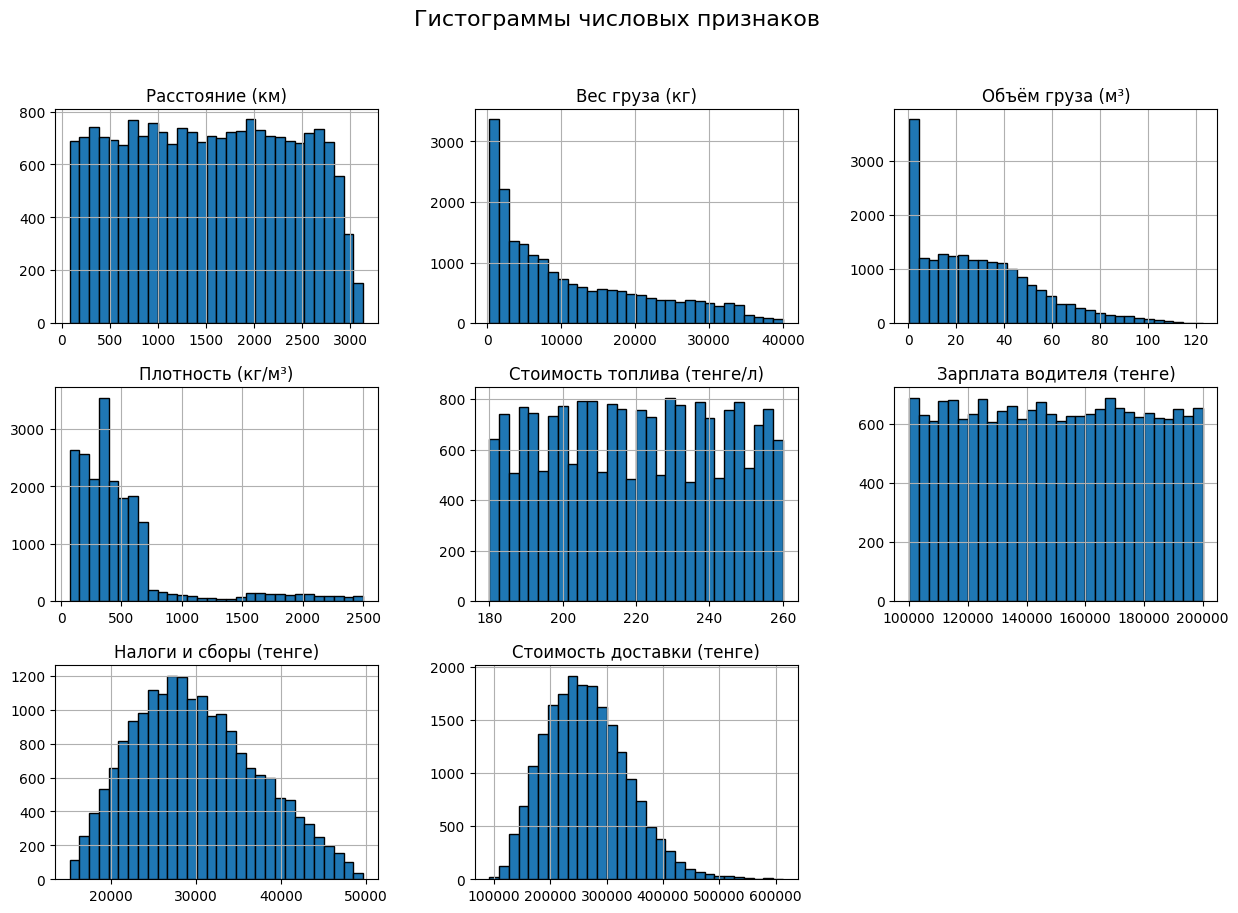

In [11]:
# Унивариантный анализ

# Гистограммы для числовых признаков
if numeric_cols:
    price_df[numeric_cols].hist(bins=30, figsize=(15,10), edgecolor='black')
    plt.suptitle('Гистограммы числовых признаков', fontsize=16)
    plt.show()

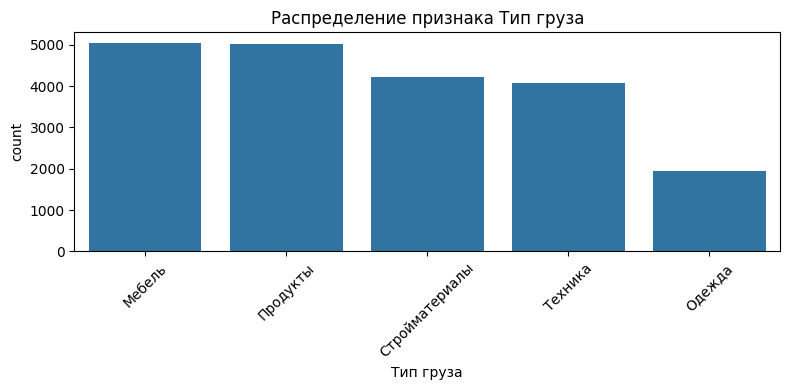

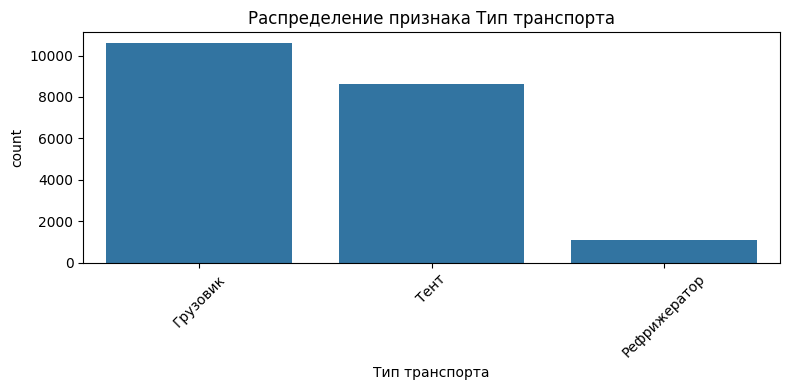

In [12]:
# Анализ строковых признаков
string_cols_to_analyze = []

for col in categorical_cols:
    if not any(keyword in col.lower() for keyword in ['id', 'дата', 'date']):
        string_cols_to_analyze.append(col)

if string_cols_to_analyze:
    for col in string_cols_to_analyze:
        plt.figure(figsize=(8,4))
        sns.countplot(data=price_df, x=col, order=price_df[col].value_counts().index)
        plt.title(f'Распределение признака {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("\nСтроковые признаки для анализа отсутствуют.")

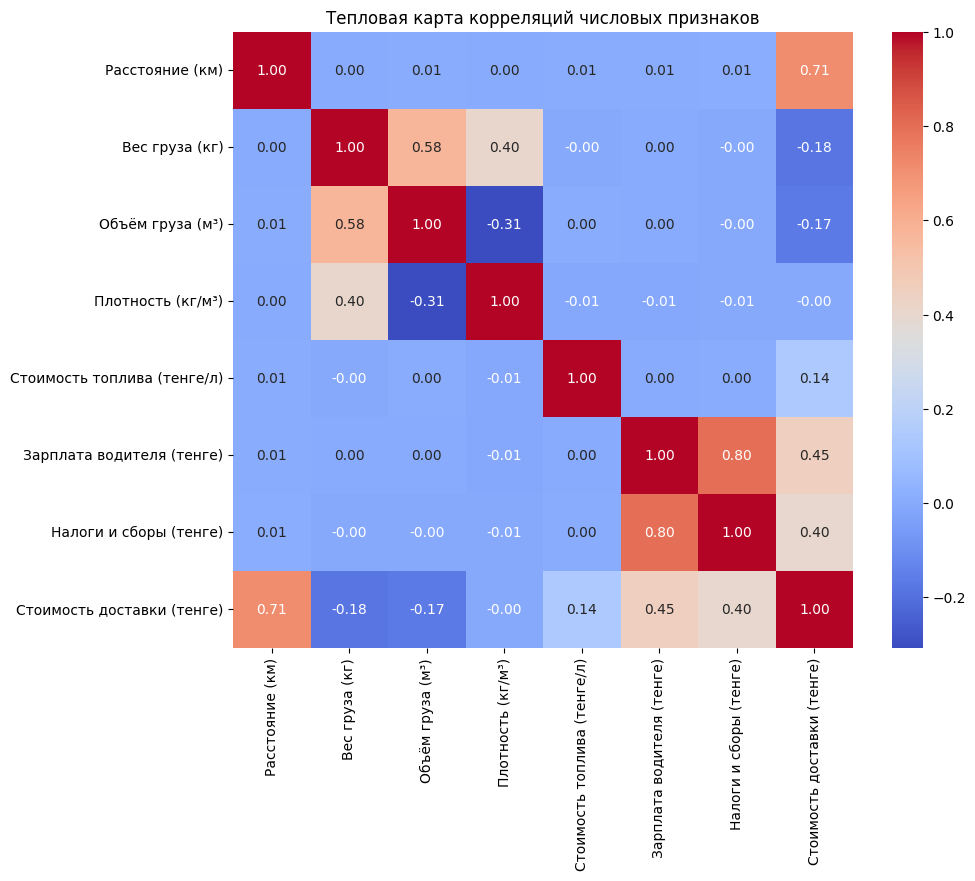

In [13]:
# Биварантный анализ

# Корреляция между числовыми признаками
if len(numeric_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(price_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Тепловая карта корреляций числовых признаков')
    plt.show()


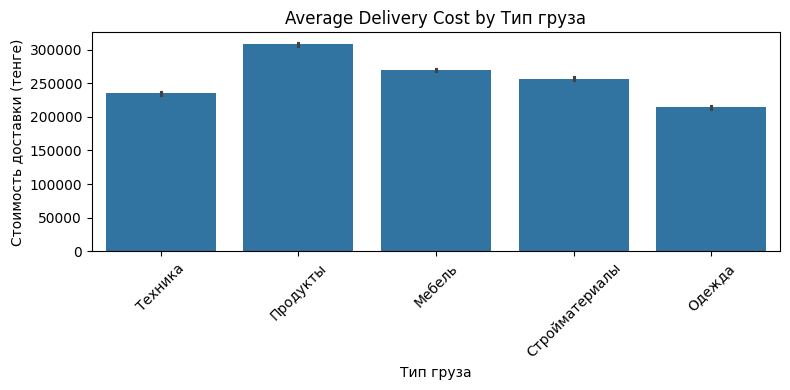

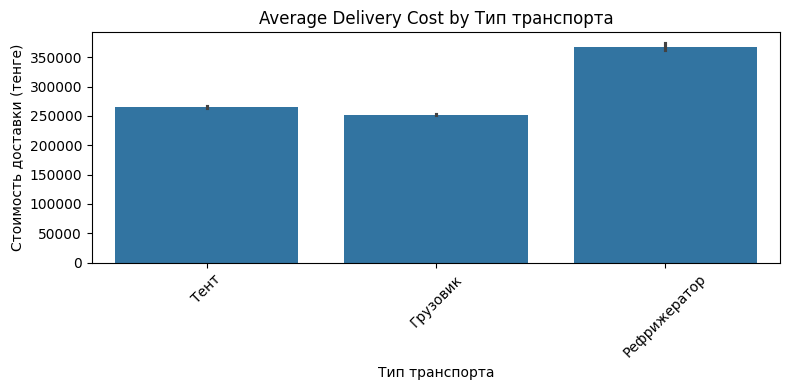

In [14]:

exclude_cols = ['Стоимость доставки (тенге)', 'ID маршрута', 'Дата отправки']  # адаптируем под структуру price1

if 'Стоимость доставки (тенге)' in price_df.columns:
    for col in categorical_cols:
        if col not in exclude_cols:
            plt.figure(figsize=(8,4))
            sns.barplot(x=col, y='Стоимость доставки (тенге)', data=price_df, estimator=lambda x: np.mean(x))
            plt.title(f'Average Delivery Cost by {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

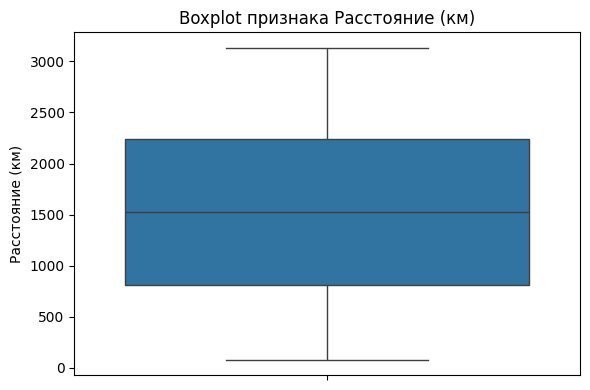

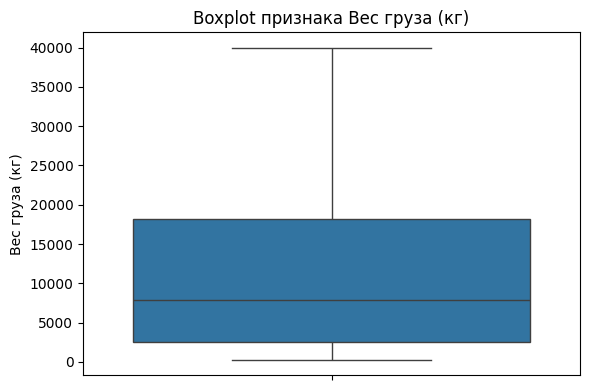

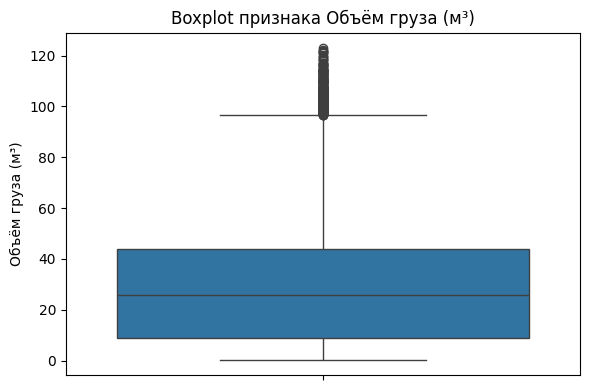

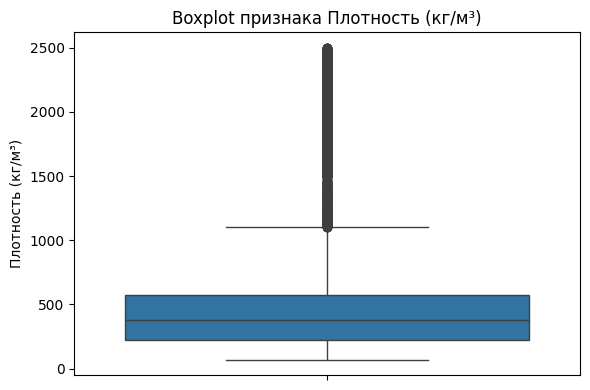

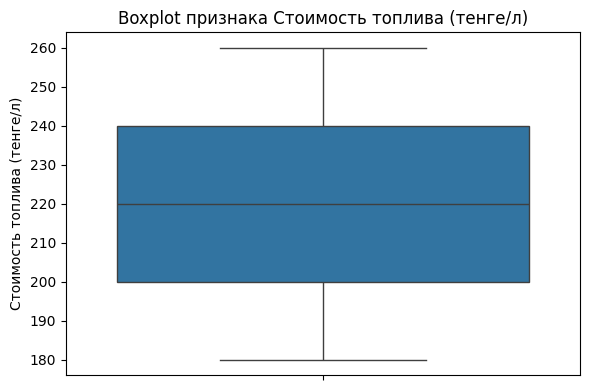

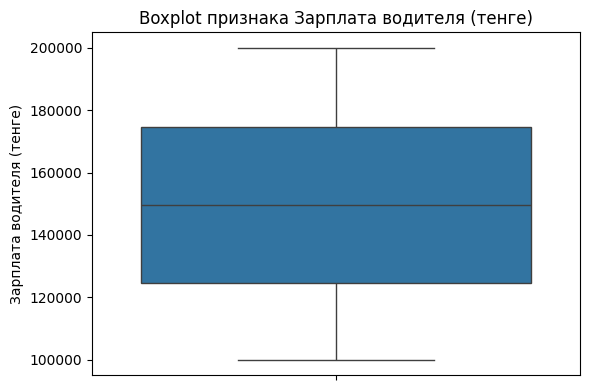

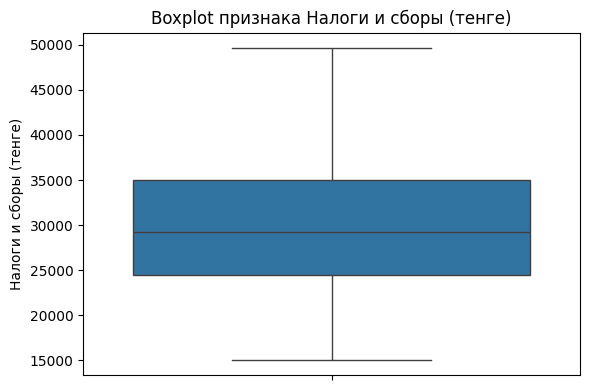

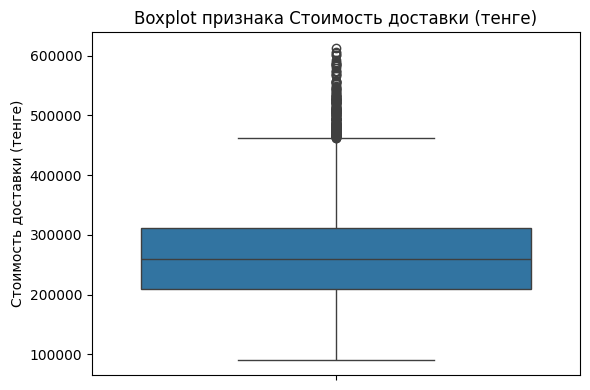

In [15]:
# Аномалии

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=price_df, y=col)
    plt.title(f'Boxplot признака {col}')
    plt.tight_layout()
    plt.show()

In [16]:
# Проверка распределения категориальных признаков
for col in string_cols_to_analyze:
    counts = price_df[col].value_counts()
    total = counts.sum()
    print(f"\nРаспределение признака {col}:")
    for value, count in counts.items():
        percentage = (count / total) * 100
        print(f"- {value}: {count} записей ({percentage:.2f}%)")


Распределение признака Тип груза:
- Мебель: 5047 записей (24.87%)
- Продукты: 5025 записей (24.76%)
- Стройматериалы: 4207 записей (20.73%)
- Техника: 4079 записей (20.10%)
- Одежда: 1934 записей (9.53%)

Распределение признака Тип транспорта:
- Грузовик: 10594 записей (52.22%)
- Тент: 8625 записей (42.52%)
- Рефрижератор: 1067 записей (5.26%)


In [17]:
# 13. Итоговые выводы по EDA
print(f"- Размер датасета: {price_df.shape}")
print(f"- Найдено {duplicate_count} дубликатов.")
print("- Пропуски обнаружены по следующим признакам:")
display(missing_data[missing_data['Количество пропусков'] > 0])

if numeric_cols:
    print(f"- Числовые признаки: {numeric_cols}")
else:
    print("- Числовые признаки отсутствуют.")

if categorical_cols:
    print(f"- Строковые признаки для анализа: {categorical_cols}")
else:
    print("- Строковые признаки для анализа отсутствуют.")

- Размер датасета: (20345, 10)
- Найдено 0 дубликатов.
- Пропуски обнаружены по следующим признакам:


,Количество пропусков,Процент пропусков
Расстояние (км),51,0.250676
Вес груза (кг),66,0.324404
Объём груза (м³),39,0.191693
Плотность (кг/м³),70,0.344065
Стоимость топлива (тенге/л),51,0.250676
Тип груза,53,0.260506
Тип транспорта,59,0.289998
Зарплата водителя (тенге),1098,5.396903
Налоги и сборы (тенге),1108,5.446056
Стоимость доставки (тенге),102,0.501352


- Числовые признаки: ['Расстояние (км)', 'Вес груза (кг)', 'Объём груза (м³)', 'Плотность (кг/м³)', 'Стоимость топлива (тенге/л)', 'Зарплата водителя (тенге)', 'Налоги и сборы (тенге)', 'Стоимость доставки (тенге)']
- Строковые признаки для анализа: ['Тип груза', 'Тип транспорта']
